In [1]:
from fastai.text import *
import numpy as np
from nltk import word_tokenize

In [2]:
class MalyalamTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.re1 = re.compile(r'  +')
    
    def fixup(self, x):
        x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
            ' @-@ ','-').replace('\\', ' \\ ').replace('\u200d','').replace('\xa0',' ').replace(
            '\u200c','').replace('“',' ').replace('”',' ').replace('"',' ').replace('\u200b','')
        x = re.sub('[\(\[].*?[\)\]]', '', x)
        x = re.sub('<[^<]+?>', '', x)
        x = re.sub('[A-Za-z]+','ENG ', x)
        x = re.sub(r'\d+.?(\d+)?','NUM ',x).replace("(","").replace(")","")
        return self.re1.sub(' ', html.unescape(x))

        
    def tokenizer(self, t:str) -> List[str]:
        t = self.fixup(t)
        return word_tokenize(t)

In [3]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [4]:
data_lm = TextLMDataBunch.from_csv(path='wiki/ml/', csv_name='train_class_lm.csv',text_cols=[1],
                                 tokenizer=tokenizer)

In [5]:
len(data_lm.vocab.itos)

60008

In [6]:
data_lm.show_batch()

idx,text
0,"xxunk ജിഎസ്ടി ഈടാക്കും . ടയര് റീ xxunk xxunk കണക്കാക്കി xxup num ശതമാനം നികുതി ചുമത്തുമെന്നും പരോക്ഷ നികുതി വകുപ്പ് വ്യക്തമാക്കിയിട്ടുണ്ട് . ബസ് ബോഡി നിര്മാണത്തിന് ജിഎസ്ടി ബാധകമാണ് . xxunk അസംസ്കൃത വസ്തു , അവയുടെ വിതരണം , xxunk എല്ലാം കൂടി പരിഗണിച്ചാണ് ജിഎസ്ടി . xxup eng ട്രാന്സ്പോര്ട്ട് കമ്മീഷ്ണറുടെ xxunk വിരുദ്ധമായി ഗതാഗതവകുപ്പില് അധിക തസ്തിക xxunk തീരുമാനം വിവാദത്തിലേക്ക് xxunk കേരള പദ്ധതിക്കായി xxup num മോട്ടോര് വെഹിക്കിള് ഇന്സ്പെക്ടര്മാരുടെ ഉള്പ്പടെ xxup num പേരുടെ തസ്തിക xxunk നീക്കം ഗുണകരമല്ലെന്ന് ഗതാഗതവകുപ്പില് നിന്ന് തന്നെ വിമര്ശനമുയരുന്നു"
1,"രാജ്യത്തെ കോടിപതികളുടെ പട്ടികയിലും ക്രമാതീതമായ വളര്ച്ചയുണ്ടായതായും സര്വേയില് നിന്ന് വ്യക്തമാണ് . xxup num ശതകോടീശ്വരന്മാരാണ് കഴിഞ്ഞ വര്ഷം ഉണ്ടായത് . ഇതോടെ രാജ്യത്താകെ ശതകോടീശ്വരന്മാരുടെ എണ്ണം xxup num കടന്നു . xxup num മുതല് പ്രതിവര്ഷം xxup num ശതമാനം വളര്ച്ചയാണ് കോടിപതികളുടെ കാര്യത്തിലുണ്ടാവുന്നത് . ഒരു എ ക്ലാസ് സര്ക്കാര് ജീവനക്കാരന്റെ ഒരു വര്ഷത്തെ വരുമാനം , ഗ്രാമപ്രദേശങ്ങളിലെ മിനിമം വേതനം കൈപ്പറ്റുന്ന ഒരു തൊഴിലാളിക്ക് സമ്പാദിക്കാന് xxup num വര്ഷങ്ങള് വേണ്ടി വരുന്നു എന്നതും ഇന്ത്യയില് നിലനില്ക്കുന്ന കടുത്ത സാമ്പത്തിക അസമത്വത്തിന്റെ അളവ് സൂചിപ്പിക്കുന്നു . ഇന്ത്യയിലെ സമ്പത്തിന്റെ xxup num ശതമാനവും"
2,"xxunk ഖാദി ബോര്ഡ് . 'സഖാവ് ' ഷര്ട്ടുകളും മുണ്ടുകളുമാണ് മുഖ്യ ആകര്ഷണം മുപ്പത് ശതമാനം xxunk . 'സഖാവ് ' ഷര്ട്ടുകളും മുണ്ടുകളുമാണ് ഇത്തവണ xxunk താരങ്ങള് . ആകര്ഷകമായ നിറങ്ങളില് , ഡിസൈനുകളില് ഷര്ട്ടുകളും xxunk ഉപഭോക്താക്കളെ കാത്തിരിക്കുന്നു . xxup num രൂപയ്ക്ക് ഷര്ട്ടും xxup num രൂപയ്ക്ക് മുണ്ടും വാങ്ങാം . ഇതുമാത്രമല്ല , xxunk തരം സാരികള് , xxunk , ചുരിദാര് xxunk എല്ലാമുണ്ട് . സര്ക്കാര് – xxunk സ്ഥാപനങ്ങളിലെ ജീവനക്കാര്ക്ക് തുണിത്തരങ്ങളുടെ വില xxunk നല്കിയാല് മതി . പരിധി അമ്പതിനായിരം രൂപയായി വര്ധിപ്പിച്ചിട്ടുണ്ട് . xxunk"
3,"മികവ് പരിഗണിച്ചാല് ബല്ജിയം ഫുട്ബോളിലെ സുവര്ണതലമുറയാണ് ഇത്തവണയും ലോകകപ്പില് ഇറങ്ങുന്നത് . മാഞ്ചസ്റ്റര് സിറ്റിയുടെ വിന്സന്റ് കോംപനി , കെവിന് xxunk , മാഞ്ചസ്റ്റര് യുണൈറ്റഡിന്റെ റൊമേലു ലുക്കാക്കു , മൗറീന് xxunk , ചെല്സിയുടെ ഏദന് ഹസാഡ് ബാര്സിലോനയുടെ തോമസ് xxunk കുറഞ്ഞത് ഒരു ലോകകപ്പ് xxunk ഉറപ്പിക്കാന് കെല്പ്പുള്ള താരനിര . xxunk വിങ്ങര് സെക്കന്ഡ് സ്ട്രൈക്കര് പ്ലേ മേക്കര് xxunk വിശ്വസ്തനായ കെവിന് xxunk xxunk . xxunk ആക്സില് xxunk xxunk കൂടി ചേരുമ്പോള് ബല്ജിയം മധ്യനിര കരുത്താര്ജിക്കുന്നു . xxunk xxunk വിന്സന്റ് xxunk തോമസ് xxunk പരിചയസമ്പത്തും ചുവന്ന ചെകുത്താന്മാര്ക്ക്"
4,വന്നെങ്കിലും കേസ് എടുക്കാൻ വിജിലൻസ് ഡയറക്ടർ നിർദേശം xxunk . ഭൂമി തട്ടിപ്പിന്റെ പരാതി നൽകിയ പൊതുപ്രവർത്തകർ വിജിലൻസ് ഡയറക്ടറെ ഉപരോധിക്കാൻ xxunk എഫ് ഐ ആർ ഇട്ട് അന്വേഷണം തുടങ്ങിയത് . വിജിലൻസ് കൊല്ലം xxunk പി കെ അശോക് അന്വേഷിക്കുന്ന കേസിൽ ലാൻഡ് റെക്കോർഡ്സ് വിഭാഗം ഡപ്യൂട്ടി കലക്ടറും xxunk xxunk എംഡിയും പ്രതികളാണ് . xxup num ൽ ഭൂമിക്ക് പട്ടയം നൽകിയിരുന്നുവെന്നും രേഖകൾ കൊട്ടാരക്കര സബ് റജിസ്ട്രാർ xxunk തീ xxunk xxunk റവന്യൂ ഉദ്യോഗസ്ഥരുടെ വാദം xxunk വിജിലൻസിന്റെ xxunk കണ്ടെത്തിയിരിക്കുന്നത് . xxup eng വിശ്വവിഖ്യാതമായ xxunk ലോകകപ്പിനെത്തിയ ടീമാണ്


In [7]:
# data_lm.save("data_lm_class.pkl")

In [8]:
data_lm = load_data('wiki/ml/','data_lm_class.pkl')

In [9]:
learn = language_model_learner(data_lm,AWD_LSTM, drop_mult=0.3,pretrained=False)

In [10]:
# Loading the pretrained language model on malyalam wikipedia
learn.load('third_ml_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (7490 items)
x: LMTextList
xxup eng ഇന്ത്യൻ സിനിമാ ചരിത്രത്തിൽ തന്നെ xxunk xxunk പത്മാവത് ആദ്യ ദിനം നേടിയത് xxup num കോടി രൂപ മാത്രം . ഇതിനു പുറമേ ബുധനാഴ്ച നടന്ന പ്രിവ്യൂ ഷോയിലൂടെ ചിത്രം xxup num കോടി നേടി . xxup num കോടി ചെലവിട്ട് നിർമ്മിച്ച ബ്രഹ്മാണ്ഡ ചിത്രം ആദ്യ ദിനത്തിൽ xxup num xxup num കോടി വരുമാനം xxunk പ്രതീക്ഷ . ചിത്രത്തിനെതിരെ നടന്ന അക്രമ xxunk പ്രതിഷേധങ്ങളും xxunk ചിത്രം വൻ കുതിപ്പ് നടത്തുമെന്ന് തന്നെയാണ് അണിയറക്കാരുടെ പ്രതീക്ഷ . ഒരാഴ്ചയ്ക്കകം ചിത്രം xxup num കോടിയലധികം നേടുമെന്നാണ് പ്രതീക്ഷ . വൻ തോതിൽ പ്രതിഷേധം ഇനി ഉണ്ടാകാൻ xxunk അണിയറ പ്രവർത്തകരുടെ കണക്ക് കൂട്ടൽ . അങ്ങനെ വന്നാൽ ചിത്രം മികച്ച വിജയം നേടുമെന്ന് അവർ കണക്ക് കൂട്ടുന്നു . xxup eng xxup eng xxup -eng xxup eng xxup eng xxup eng xxup eng xxup eng / xxup eng , # xxup eng xxup eng xxup eng xxup eng xxup eng xxup eng xxup num .. xxup eng xxup eng xxup eng xxup eng xxup eng / xxup eng xxup eng xxup -eng xxup eng , xxup eng xxup eng xxup eng ’ xxup eng xxup eng ₹ xx

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


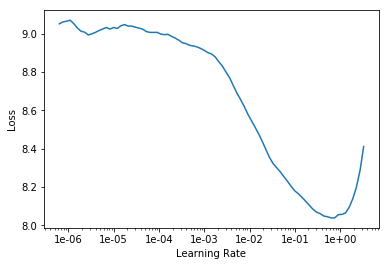

In [12]:
learn.recorder.plot()

In [13]:
learn.freeze()

In [14]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.448188,6.616826,0.280718,00:59


In [15]:
learn.save('fit_head', with_opt=True)

In [16]:
learn.load('fit_head', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (7490 items)
x: LMTextList
xxup eng ഇന്ത്യൻ സിനിമാ ചരിത്രത്തിൽ തന്നെ xxunk xxunk പത്മാവത് ആദ്യ ദിനം നേടിയത് xxup num കോടി രൂപ മാത്രം . ഇതിനു പുറമേ ബുധനാഴ്ച നടന്ന പ്രിവ്യൂ ഷോയിലൂടെ ചിത്രം xxup num കോടി നേടി . xxup num കോടി ചെലവിട്ട് നിർമ്മിച്ച ബ്രഹ്മാണ്ഡ ചിത്രം ആദ്യ ദിനത്തിൽ xxup num xxup num കോടി വരുമാനം xxunk പ്രതീക്ഷ . ചിത്രത്തിനെതിരെ നടന്ന അക്രമ xxunk പ്രതിഷേധങ്ങളും xxunk ചിത്രം വൻ കുതിപ്പ് നടത്തുമെന്ന് തന്നെയാണ് അണിയറക്കാരുടെ പ്രതീക്ഷ . ഒരാഴ്ചയ്ക്കകം ചിത്രം xxup num കോടിയലധികം നേടുമെന്നാണ് പ്രതീക്ഷ . വൻ തോതിൽ പ്രതിഷേധം ഇനി ഉണ്ടാകാൻ xxunk അണിയറ പ്രവർത്തകരുടെ കണക്ക് കൂട്ടൽ . അങ്ങനെ വന്നാൽ ചിത്രം മികച്ച വിജയം നേടുമെന്ന് അവർ കണക്ക് കൂട്ടുന്നു . xxup eng xxup eng xxup -eng xxup eng xxup eng xxup eng xxup eng xxup eng / xxup eng , # xxup eng xxup eng xxup eng xxup eng xxup eng xxup eng xxup num .. xxup eng xxup eng xxup eng xxup eng xxup eng / xxup eng xxup eng xxup -eng xxup eng , xxup eng xxup eng xxup eng ’ xxup eng xxup eng ₹ xx

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.915137,6.505189,0.287618,01:05
1,6.811839,6.427526,0.293954,01:05
2,6.757213,6.351612,0.301047,01:06
3,6.603992,6.261285,0.308469,01:06
4,6.462730,6.171619,0.314286,01:06
5,6.322495,6.078988,0.319472,01:06
6,6.064376,6.018590,0.322262,01:06
7,5.912098,5.971808,0.325374,01:06
8,5.742988,5.940405,0.326576,01:06
9,5.625899,5.911166,0.327695,01:06


In [19]:
learn.save('fine_tuned', with_opt=True)

In [20]:
learn.load('fine_tuned', with_opt=True);

In [21]:
learn.save_encoder('fine_tuned_enc')

In [22]:
data_cls = TextClasDataBunch.from_csv(path='wiki/ml/', csv_name='train_class.csv',test='test_class.csv',
                                    text_cols=[1], label_cols=[0],tokenizer=tokenizer,vocab=data_lm.vocab)

In [23]:
data_cls.show_batch()

text,target
xxup eng xxunk പിന്നാലെ എം . കരുണാനിധിയും xxunk . പല റെക്കോര്ഡുകളും മുത്തുവേല് xxunk ഇന്ത്യന് രാഷ്ട്രീയം വിളിച്ച xxunk xxunk മുഖ്യമന്ത്രി ' എന്ന xxunk ഏറെ xxunk . xxunk ഒരു പരിധിവരെ ദേശീയ രാഷ്ട്രീയത്തിന്റെയും xxunk ആ xxunk xxunk വഴിക്കും കഴിഞ്ഞു . ഒന്പത് പതിറ്റാണ്ട് പിന്നിട്ട ജീവിത സഞ്ചാരം സ്വയം xxunk xxunk . ദ്രാവിഡ രാഷ്ട്രീയം നിര്ണായക xxunk നില്ക്കുമ്പോഴാണ് കരുണാനിധിയുടെ വിയോഗം . xxunk . ഒറ്റവാക്കില് അങ്ങനെ വിശേഷിപ്പിക്കാം . വെളിച്ചവും xxunk വ്യക്തിത്വം . xxunk xxunk വിവാദങ്ങളും ഇഴചേര്ന്ന xxunk .,India
xxup eng ആട് xxup num വൻ xxunk ഈ അവസരത്തിൽ ആടിന്റെ അടുത്ത xxunk സ്കോപ്പ് ഉണ്ടാകുമോ എന്ന് ആരാധകരില് പലരും xxunk വിജയ് xxunk മറ്റ് അണിയറ xxunk ചോദിച്ചിരുന്നു . ആദ്യ ഭാഗം xxunk രണ്ടാം ഭാഗത്തെ കുറിച്ച് xxunk മൂന്നാം ഭാഗത്തിനായി പദ്ധതി ഇല്ലെന്നും അവര് വ്യക്തമാക്കുകയും ചെയ്തു . എന്നാല് ആട് xxup num വന്നാല് എങ്ങനെ ആയിരിക്കും xxunk . ഇതാ വളരെ രസകരമായ ഒരു കഥയുമായി മഹേഷ് ഗോപാൽ മുന്നോട്ടു വന്നിരിക്കുകയാണ് . ആട് ഒരുക്കിയ മിഥുൻ മാനുവൽ തോമസ് സംവിധാനം ചെയ്ത അലമാര എന്ന ചിത്രത്തിന്റെ xxunk,Entertainment
"xxup eng നല്ല നാളുകള് കൊണ്ടുവരുമെന്ന് പ്രഖ്യാപിച്ച് അധികാരത്തിലേറിയ നരേന്ദ്ര മോദി സര്ക്കാര് നാലു വര്ഷം xxunk . ഇനിയുള്ളത് അവസാന ലാപ്പിലെ ഒാട്ടം . മോദിയുടെ ഭരണത്തിന് ജനം xxunk xxunk ദിനം xxunk . ഒരു സര്ക്കാരിനെ വിലയിരുത്താന് ആവശ്യമായ xxunk കടന്നുപോയത് . നരേന്ദ്ര മോദി അധികാരം xxunk ? സമകാലിക ഇന്ത്യന് രാഷ്ട്രീയത്തിലെ xxunk വീഴ്ത്താന് xxunk xxunk ? കഷ്ടിച്ച് ഒരു വര്ഷമാണ് നരേന്ദ്ര മോദിക്ക് മുന്നിലുള്ളത് . അത് xxunk . xxunk xxunk കൊണ്ടുവരുമെന്ന് പ്രഖ്യാപിച്ചാണ് ബിജെപി xxunk . പെട്രോള് , ഡീസല് വില വര്ധനയില് ജനം",India
xxup eng ജനാധിപത്യത്തിന് തെറ്റുകള് തിരുത്താനുള്ള കഴിവുണ്ടെന്ന് ചരിത്രം തരുന്ന ഒരു ആത്മവിശ്വാസമുണ്ട് . കഴിഞ്ഞ തവണ പറയാതെ വയ്യ അവസാനിച്ചത് ഇങ്ങനെയാണ് . കര്ണാടക ആ വിശ്വാസം ഉറപ്പിക്കുന്നു . കേന്ദ്രാധികാരത്തിന്റെ ബലത്തില് xxup num മണിക്കൂര് മുഖ്യമന്ത്രിക്കസേരയിലിരുന്ന യെഡിയൂരപ്പ xxunk പടിയിറങ്ങി . കീഴ്വഴക്കങ്ങളും ചട്ടങ്ങളും ജനാധിപത്യ മര്യാദയും അട്ടിമറിച്ച ഭരണകൂട രാഷ്ട്രീയത്തെ ചെറുത്തു xxunk കോണ്ഗ്രസിനും ജെ.ഡി.എസിനും അഭിനന്ദനങ്ങള് . ഏതു xxunk xxunk xxunk ഇന്ത്യന് xxunk xxunk . xxunk xxunk xxunk പ്രതിരോധം xxunk xxunk xxunk . അതിന്റെ ആയുസ് എത്രയാണെന്ന് ഇപ്പോള് xxunk xxunk xxunk രാജ്യത്ത്,India
xxup eng xxunk ശേഷം യൂത്ത് ലീഗ് നേതാവ് പികെ xxunk തുറന്ന xxunk സമസ്ത രംഗത്ത് . ഫറൂഖ് കോളജ് വിവാദത്തില് കടുത്ത സ്ത്രീ xxunk നടത്തിയ അധ്യാപകനെതിരെ ഫെയ്സ്ബുക്കില് xxunk സമസ്ത നേതാക്കളെ ചൊടിപ്പിച്ചത് . മുസ്ലിം xxunk വളര്ന്നു വരുന്ന ഫാഷന് xxunk മുജാഹിദ് വിഭാഗം xxunk xxunk xxunk xxunk നടത്തിയ xxunk ഭാഗം xxunk xxunk സ്ത്രീ പക്ഷ നിലപാടിനെ xxunk അതിന്റെ പേരില് അധ്യാപകനെ xxunk ചെയ്യുന്ന കപട xxunk മതേതര xxunk xxunk പ്രഖ്യാപിച്ച പി.കെ xxunk സമീപനം xxunk നേതാക്കള് സംയുക്തമായി പുറപ്പെടുവിച്ച ഫെയ്സ്ബുക്ക് പോസ്റ്റില് വ്യക്തമാക്കി,Kerala


In [24]:
# data_cls.save("data_cls.pkl")

In [25]:
data_cls = load_data("wiki/ml/",'data_cls.pkl')

In [26]:
data_cls.sanity_check()

In [27]:
learn = text_classifier_learner(data_cls,AWD_LSTM, drop_mult=0.5,pretrained=False)

In [28]:
learn.load_encoder('fine_tuned_enc')

In [29]:
learn.freeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


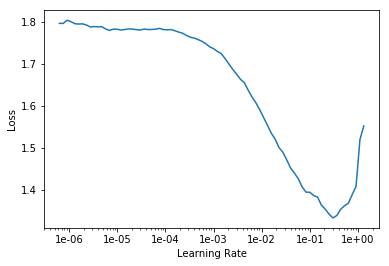

In [31]:
learn.recorder.plot()

In [32]:
learn.metrics = [accuracy]

In [33]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.919955,0.618002,0.791222,00:18


In [34]:
learn.save('first-full')

In [35]:
learn.load('first-full')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6740 items)
x: TextList
xxup eng കനത്ത xxunk പ്രളയക്കെടുതിയിൽ മുങ്ങി വയനാട് ജില്ല . ദുരന്തനിവാരണസേന റെഡ് അലര്ട്ട് പ്രഖ്യാപിച്ചു . xxunk മണ്ണിടിഞ്ഞ് ഗതാഗത തടസം xxunk ജില്ല ഏറെക്കുറെ ഒറ്റപ്പെട്ടു . കേരളത്തെ കർണാടക തമിഴ്നാട് സംസ്ഥാനങ്ങളുമായി ബന്ധിപ്പിക്കുന്ന ദേശീയ പാതയുടെ ഭാഗമായ താമരശേരി ചുരം കഴിഞ്ഞ xxup num മണിക്കൂറായി സ്തംഭിച്ചിരിക്കുകയാണ് . രണ്ടായിരത്തോളം പേരെ ക്യാംപുകളിലേക്ക് മാറ്റി . xxunk നാവികസേനയുടെ xxunk ഒരു ഹെലികോപ്റ്ററും xxunk . ജില്ലയിൽ ഇതുവരെ xxunk തരത്തിലുള്ള മഴയാണ് തുടർച്ചയായി പെയ്യുന്നത് . xxunk ഉരുൾപൊട്ടി . താമരശേരി ചുരത്തിൽ അർദ്ധരാത്രി മുതൽ പലയിടങ്ങളിലായി മണ്ണിടിഞ്ഞു . വൈത്തിരി xxunk xxunk മണ്ണിടിഞ്ഞു .ഈ ഭാഗങ്ങളിൽ അപകടാവസ്ഥ തുടരുകയാണ് . xxunk xxunk ബന്ധിപ്പിക്കുന്ന xxunk മണിക്കൂറുകളോളം ഗതാഗതം xxunk . കുറ്റ്യാടി ചുരത്തിലും നിയന്ത്രണമുണ്ട് . താഴ്ന്ന പ്രദേശത്തുള്ള വീടുകളിൽ പലതും xxunk . വൈദ്യുതി ബന്ധം തകർന്നു . എത്തിപ്പെടാൻ xxunk xxunk സാരമായി ബാധിക്കുന്നു . ബാണാസുര സാഗർ അണക്കെട്ടിലെ ഷട്ടറുകൾ രണ്ടര xxunk ഉയർത്തി . ഇതു വര

In [36]:
learn.freeze_to(-2)
learn.fit_one_cycle(20, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.794574,0.582848,0.802491,00:23
1,0.756918,0.557617,0.808422,00:23
2,0.697413,0.532253,0.814947,00:23
3,0.678499,0.533219,0.816133,00:23
4,0.613379,0.489471,0.829775,00:22
5,0.562143,0.528258,0.823843,00:23
6,0.506367,0.501187,0.845789,00:22
7,0.448366,0.489022,0.842823,00:23
8,0.403032,0.488620,0.858244,00:23
9,0.359662,0.480244,0.862396,00:22


In [37]:
learn.save('second')

In [38]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6740 items)
x: TextList
xxup eng കനത്ത xxunk പ്രളയക്കെടുതിയിൽ മുങ്ങി വയനാട് ജില്ല . ദുരന്തനിവാരണസേന റെഡ് അലര്ട്ട് പ്രഖ്യാപിച്ചു . xxunk മണ്ണിടിഞ്ഞ് ഗതാഗത തടസം xxunk ജില്ല ഏറെക്കുറെ ഒറ്റപ്പെട്ടു . കേരളത്തെ കർണാടക തമിഴ്നാട് സംസ്ഥാനങ്ങളുമായി ബന്ധിപ്പിക്കുന്ന ദേശീയ പാതയുടെ ഭാഗമായ താമരശേരി ചുരം കഴിഞ്ഞ xxup num മണിക്കൂറായി സ്തംഭിച്ചിരിക്കുകയാണ് . രണ്ടായിരത്തോളം പേരെ ക്യാംപുകളിലേക്ക് മാറ്റി . xxunk നാവികസേനയുടെ xxunk ഒരു ഹെലികോപ്റ്ററും xxunk . ജില്ലയിൽ ഇതുവരെ xxunk തരത്തിലുള്ള മഴയാണ് തുടർച്ചയായി പെയ്യുന്നത് . xxunk ഉരുൾപൊട്ടി . താമരശേരി ചുരത്തിൽ അർദ്ധരാത്രി മുതൽ പലയിടങ്ങളിലായി മണ്ണിടിഞ്ഞു . വൈത്തിരി xxunk xxunk മണ്ണിടിഞ്ഞു .ഈ ഭാഗങ്ങളിൽ അപകടാവസ്ഥ തുടരുകയാണ് . xxunk xxunk ബന്ധിപ്പിക്കുന്ന xxunk മണിക്കൂറുകളോളം ഗതാഗതം xxunk . കുറ്റ്യാടി ചുരത്തിലും നിയന്ത്രണമുണ്ട് . താഴ്ന്ന പ്രദേശത്തുള്ള വീടുകളിൽ പലതും xxunk . വൈദ്യുതി ബന്ധം തകർന്നു . എത്തിപ്പെടാൻ xxunk xxunk സാരമായി ബാധിക്കുന്നു . ബാണാസുര സാഗർ അണക്കെട്ടിലെ ഷട്ടറുകൾ രണ്ടര xxunk ഉയർത്തി . ഇതു വര

In [39]:
learn.predict("ബിഗ് ബോസ് എന്ന റിയാലിറ്റി ഷോയിലൂടെ മലയാളികളുടെ പ്രിയങ്കരനായി മാറിയ ടെലിവിഷന്‍ താരമാണ് ഷിയാസ് ")

(Category Entertainment,
 tensor(1),
 tensor([1.5609e-10, 1.0000e+00, 1.2379e-08, 1.5966e-12, 4.2246e-08, 5.4596e-07]))

In [40]:
learn.predict("ന്യൂഡല്‍ഹി: തിരഞ്ഞെടുപ്പിന് മാസങ്ങൾമാത്രം ശേഷിക്കെ മോദി സർക്കാരിന്റെ അഞ്ചുവർഷത്തെ നേട്ടങ്ങൾ")

(Category Gulf,
 tensor(2),
 tensor([5.6457e-03, 6.3099e-05, 9.9352e-01, 2.8604e-04, 8.9906e-06, 4.7447e-04]))

In [41]:
learn.predict("കോഴിക്കോട്: ഏറെ പ്രതീക്ഷയോടെ ഐ ലീഗ് സീസണിന് ഇറങ്ങിയ ഗോകുലം കേരള എഫ്.സിക്ക് ഒടുവില്‍ നിരാശയായിരുന്നു")

(Category Kerala,
 tensor(4),
 tensor([3.7398e-04, 1.0019e-03, 1.6606e-03, 4.2050e-06, 9.4429e-01, 5.2668e-02]))